In [1]:
import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt

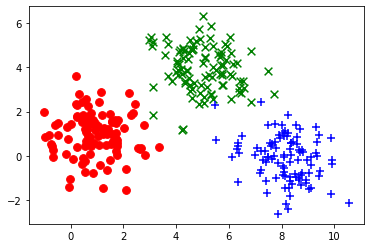

In [2]:
# generate point near (1, 1)
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))

# generate point near (5, 4)
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))

# generate point near (1, 1)
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

# show cluster
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='+', s=60)

In [3]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

# define classification
# label0 = [1, 0, 0]
# label1 = [0, 1, 0]
# label2 = [0, 0, 1]
labels = np.matrix(
    [[1., 0., 0.]] * len(x1_label0) +
    [[0., 1., 0.]] * len(x1_label1) +
    [[0., 0., 1.]] * len(x1_label2)
)

# start shuffle data
arr = np.arange(xs.shape[0]) # work just like linespace
np.random.shuffle(arr)

xs = xs[arr]
labels = labels[arr]

# create test dataset
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix(
    [[1., 0., 0.]] * len(test_x1_label0) +
    [[0., 1., 0.]] * len(test_x1_label1) +
    [[0., 0., 1.]] * len(test_x1_label2)
)

In [4]:
# num_features = number of dimension
# train size = training dataset size
train_size, num_features = xs.shape
print(f"Train size   = {train_size}")
print(f"Num features = {num_features}")

Train size   = 300
Num features = 2


In [5]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))

def model(X, W, b):
    reduce_dimension = 1
    logits = tf.add(tf.matmul(X, W), b)
    sum_logits = tf.matmul(
        tf.expand_dims(tf.reduce_sum(tf.exp(logits), reduce_dimension), reduce_dimension),
        tf.ones([reduce_dimension, num_labels])
    )
    return tf.divide(tf.exp(logits), sum_logits)

y_model = model(X, W, b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# calculate total number of batch, feed a single batch per train
total_batch = training_epochs * train_size // batch_size
for step in range(total_batch):
    offset = (step * batch_size) % train_size
    batch_xs = xs[offset:(offset + batch_size)]
    batch_labels = labels[offset:(offset + batch_size)]
    err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
    # print(step, err)

W_val = sess.run(W)
print(f"W Val = {W_val}")
b_val = sess.run(b)
print(f"b Val = {b_val}")

print("accuracy", sess.run(accuracy, feed_dict={X: test_xs, Y: test_labels}))
print(sess.run(correct_prediction, feed_dict={X: test_xs, Y: test_labels}))

print(sess.run(tf.argmax(y_model, 1), feed_dict={X: [[5, 4]]}))

W Val = [[-2.6603618   0.5529599   2.107325  ]
 [-0.09465601  1.757847   -1.6632107 ]]
b Val = [10.145043  -3.4290898 -6.7159796]
accuracy 1.0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1]
